<a href="https://colab.research.google.com/github/prashanth-ds-ml/PyTorch/blob/main/PyTorch_workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. data(prepare and load)
2. build model
3. fitting the model
4. making the predictions
5. saving the model
6. putting all together

In [1]:
import torch

In [2]:
from torch import nn
import matplotlib.pyplot as plt

torch.__version__

'1.13.1+cu116'

In [3]:
# 1. Data preparation

weight = 0.7
bias = 0.5

start = 0
end = 1
step = 0.03
X = torch.arange(start,end,step).unsqueeze(dim=1)

y = weight * X + bias

X[:10],y[:10]

(tensor([[0.0000],
         [0.0300],
         [0.0600],
         [0.0900],
         [0.1200],
         [0.1500],
         [0.1800],
         [0.2100],
         [0.2400],
         [0.2700]]), tensor([[0.5000],
         [0.5210],
         [0.5420],
         [0.5630],
         [0.5840],
         [0.6050],
         [0.6260],
         [0.6470],
         [0.6680],
         [0.6890]]))

In [4]:
len(X),len(y)

(34, 34)

In [5]:
# train_test_split

train = int(0.8 * len(X))
X_train ,y_train = X[:train],y[:train]
X_test,y_test = X[train:],y[train:]

len(X_train),len(y_train),len(X_test),len(y_test)

(27, 27, 7, 7)

In [6]:
def plot_prediction(train_data = X_train,
                    train_labels = y_train,
                    test_data = X_test,
                    test_labels = y_test,
                    predictions = None):

    plt.figure(figsize = (10,7))

    plt.scatter(train_data,train_labels,c='b',s=4,label = 'Training data')
    plt.scatter(test_data,test_labels,c='g',s=4,label = 'Testing data')

    if predictions is not None:
        plt.scatter(test_data,predictions,c='r',s=4,label = 'Predictions')
    plt.legend(prop={'size':14});
                    

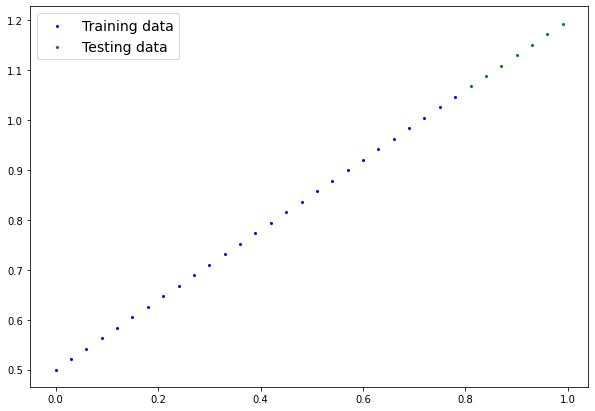

In [7]:
plot_prediction();

In [8]:
# Building a model

class LinearRegressionModel(nn.Module): # <- almost everything in PyTorch is a nn.Module (think of this as neural network lego blocks)
    def __init__(self):
        super().__init__() 
        self.weights = nn.Parameter(torch.randn(1, 
                                                dtype=torch.float), 
                                                requires_grad=True) 

        self.bias = nn.Parameter(torch.randn(1,
                                            dtype=torch.float), 
                                            requires_grad=True) 

    # Forward defines the computation in the model
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.weights * x + self.bias

In [9]:
# PyTorch model building essentials

torch.manual_seed(42)

model_0 = LinearRegressionModel()

model_0

list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True), Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [10]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [11]:
# making predictions

with torch.inference_mode():
    y_preds = model_0(X_test)
    
    
y_preds

tensor([[0.4015],
        [0.4116],
        [0.4217],
        [0.4318],
        [0.4419],
        [0.4520],
        [0.4621]])

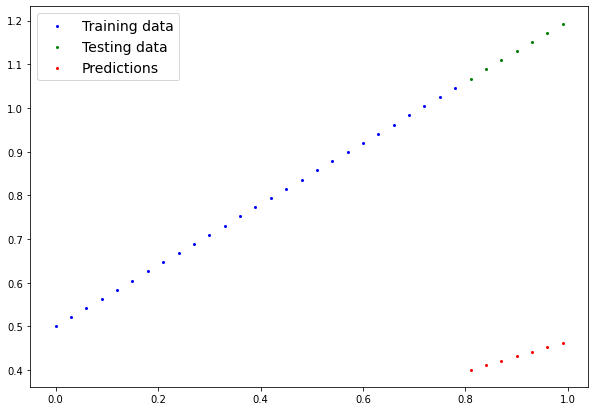

In [12]:
plot_prediction(predictions = y_preds)

In [13]:
# setting up a loss function and a optimizer

loss_func = nn.L1Loss()
optimizer = torch.optim.SGD(params = model_0.parameters(),lr = 0.01)


# training  and testing loops

1. loop through the data
2. forward pass `forward() also called forward propagation
3. calculate the loss
4. optimizer zero gradient
5. loss backward also called as back propagation
6. optimizer step(**gradient decent**)

In [14]:
torch.manual_seed(42)

epochs = 200

epoch_count = []
loss_values = []
test_loss_values = []

for epoch in range(epochs):
    model_0.train()
    y_pred = model_0(X_train)
    loss = loss_func(y_pred,y_train)
    #print(f'loss:{loss}')
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    model_0.eval()
    with torch.inference_mode():
        test_preds = model_0(X_test)
        test_loss = loss_func(test_preds,y_test)
    if epoch % 10 == 0:
        epoch_count.append(epoch)
        loss_values.append(loss)
        test_loss_values.append(test_loss)
        print(f"Epoch:{epoch} | Loss:{loss} | Test loss: {test_loss}")
        print(model_0.state_dict())

Epoch:0 | Loss:0.5128813982009888 | Test loss: 0.6846593022346497
OrderedDict([('weights', tensor([0.3406])), ('bias', tensor([0.1388]))])
Epoch:10 | Loss:0.39767131209373474 | Test loss: 0.5495592355728149
OrderedDict([('weights', tensor([0.3796])), ('bias', tensor([0.2388]))])
Epoch:20 | Loss:0.28246137499809265 | Test loss: 0.4144594371318817
OrderedDict([('weights', tensor([0.4186])), ('bias', tensor([0.3388]))])
Epoch:30 | Loss:0.16725152730941772 | Test loss: 0.2793596088886261
OrderedDict([('weights', tensor([0.4576])), ('bias', tensor([0.4388]))])
Epoch:40 | Loss:0.06046948581933975 | Test loss: 0.15194712579250336
OrderedDict([('weights', tensor([0.4963])), ('bias', tensor([0.5314]))])
Epoch:50 | Loss:0.03617817908525467 | Test loss: 0.09477672725915909
OrderedDict([('weights', tensor([0.5261])), ('bias', tensor([0.5618]))])
Epoch:60 | Loss:0.03149689733982086 | Test loss: 0.07559589296579361
OrderedDict([('weights', tensor([0.5465])), ('bias', tensor([0.5625]))])
Epoch:70 | L

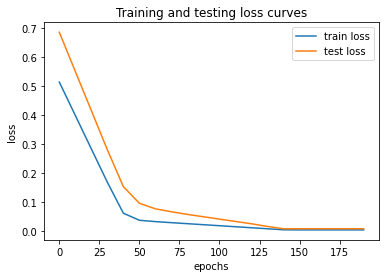

In [15]:
import numpy as np
import matplotlib.pyplot as plt

plt.plot(epoch_count,np.array(torch.tensor(loss_values).numpy()),label = 'train loss')
plt.plot(epoch_count,test_loss_values,label = 'test loss')
plt.title('Training and testing loss curves')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend();

In [16]:
with torch.inference_mode():
    y_preds_new = model_0(X_test)

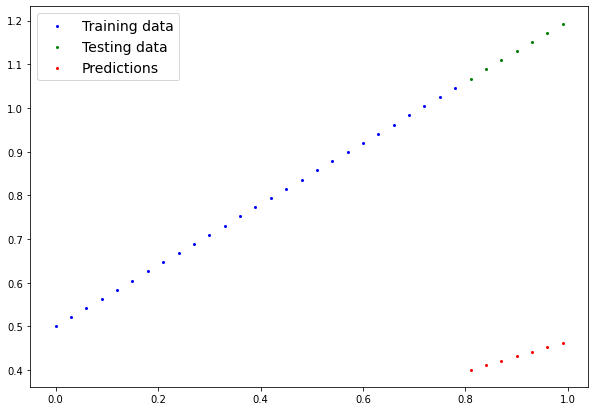

In [17]:
plot_prediction(predictions = y_preds)

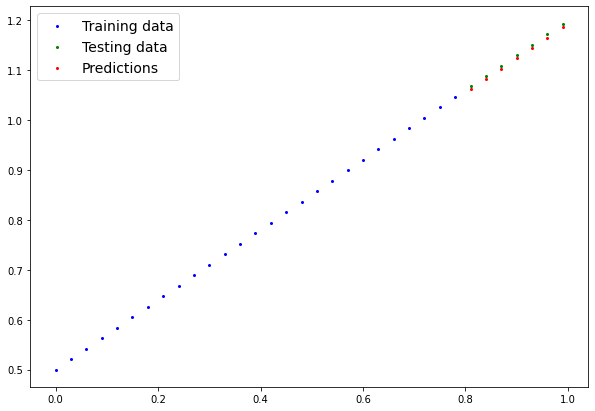

In [18]:
plot_prediction(predictions = y_preds_new)

In [19]:
# saving a model
import os
from pathlib import Path

model_path = Path('models')
model_path.mkdir(parents = True)

model_name = 'PyTorch_workflow_model_0.pt'
model_save_path = model_path/ model_name

print(f'save model to:{model_save_path}')
torch.save(obj = model_0.state_dict(),f = model_save_path)

save model to:models/PyTorch_workflow_model_0.pt


In [20]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6928])), ('bias', tensor([0.4999]))])

In [23]:
loaded_model_0 = LinearRegressionModel()

# to load saved stae_dict()

loaded_model_0.load_state_dict(torch.load(f = model_save_path))

<All keys matched successfully>

In [25]:
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.6928])), ('bias', tensor([0.4999]))])

In [26]:
# making prediction with loaded model

loaded_model_0.eval()
with torch.inference_mode():
  loaded_model_preds = loaded_model_0(X_test)

loaded_model_preds

tensor([[1.0611],
        [1.0819],
        [1.1027],
        [1.1235],
        [1.1443],
        [1.1651],
        [1.1858]])

In [27]:
model_0.eval()
with torch.inference_mode():
  y_preds = model_0(X_test)

y_preds

tensor([[1.0611],
        [1.0819],
        [1.1027],
        [1.1235],
        [1.1443],
        [1.1651],
        [1.1858]])

In [28]:
y_preds == loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])